In [1]:
import numpy as np
from random import randint, random, choice
from time import perf_counter, time, sleep
from matplotlib.pyplot import title, xlabel, ylabel, legend, plot, show, savefig
from IPython.display import clear_output
from PIL.ImageGrab import grab
from tkinter import *
import networkx as nx
import cProfile
import re

**Création du labyrinthe**

In [16]:
class Labb:
    
    def __init__(self, lines, cols):
        self.lines = lines#nombre de lignes du labyrinthe
        self.cols = cols#nombre de colonnes du labyrinthe
        self.grille = None #on memorise le labyrinthe dans cette liste (qui n'existe pas a l'initialisation)
        self.ch = ""
    
    def init(self):
        """initialise le labyrinthe"""
        self.grille = []
        for i in range(self.lines):
            self.grille.append([])
            for j in range(self.cols):
                self.grille[i].append([0, [False, False, False, False]]) #0 pour "non visité", le reste pour "pas de mur"
                #                          haut   droite  bas   gauche
    def full(self):
        """active tous les murs"""
        for i in range(self.lines):
            for j in range(self.cols):
                self.grille[i][j][1] = [True, True, True, True] #On met des murs partout partout partout
                
    def enleverMur(self, x, y, n): #x, y pour la position ; n pour la direction du mur a enlever par rapport a la case
        """enleve le mur a la position (x, y) en direction n :\n-si n vaut 0 : haut\n-si n vaut 1 : droite\n-si n vaut 2 : bas\n-si n vaut 3 : gauche"""
        if n == 0 and x > 0: #direction haut
            self.grille[x][y][1][0] = False #On enleve le mur haut de la case...
            self.grille[x - 1][y][1][2] = False #...et celui du mur bas de la case au dessus
        if n == 1 and y < self.cols - 1: #direction droite
            self.grille[x][y][1][1] = False
            self.grille[x][y + 1][1][3] = False
        if n == 2 and x < self.lines - 1: #direction bas
            self.grille[x][y][1][2] = False
            self.grille[x + 1][y][1][0] = False
        if n == 3 and y > 0: #direction gauche
            self.grille[x][y][1][3] = False
            self.grille[x][y - 1][1][1] = False
            
    def random(self, p = 0.5):
        """enleve des murs au hasard selon la probabilite 'p'"""
        for i in range(self.lines):
            for j in range(self.cols): #Pour chaque case,
                for k in range(2): #pour chaque mur, 
                    val = random()
                    if val < p: #on effectue un test
                        self.enleverMur(i, j, k) #s'il reussi, on anihile le mur
        
    def maj_ch(self):
        """mets a jour la chaine de caractere associee au labyrinthe"""
        self.ch = ""
        for i in range(self.lines):
            for j in range(self.cols):#affichage des horizontaux
                if self.grille[i][j][1][0]:#position (i, j), [1] = on regarde les murs ; [0] = on check le mur haut
                    self.ch += "+---"
                else:
                    self.ch += "+   "
            self.ch += "+\n"
            for j in range(self.cols):#affichage des verticaux
                if not self.grille[i][j][1][3] or (i == 0 and j == 0):#position (i, j), [1] = on regarde les murs ; [3] = on check le mur gauche
                    self.ch += "    "
                else:
                    self.ch += "|   "
            if i != self.lines - 1:
                self.ch += "|\n"
            else:
                self.ch += " \n"
        for i in range(self.cols):
            self.ch += "+---"
        self.ch += "+"
        
    def maj_ch_res(self, sol):
        """mets a jour la chaine de caractere associee au labyrinthe en marquant la solution"""
        self.ch = ""
        for i in range(self.lines):
            for j in range(self.cols):#affichage des horizontaux
                if self.grille[i][j][1][0]:#position (i, j), [1] = on regarde les murs ; [0] = on check le mur haut
                    self.ch += "+---"
                else:
                    self.ch += "+   "
            self.ch += "+\n"
            for j in range(self.cols):#affichage des verticaux
                if not self.grille[i][j][1][3] or (i == 0 and j == 0):#position (i, j), [1] = on regarde les murs ; [3] = on check le mur gauche
                    if (i, j) in sol:
                        self.ch += "  x "
                    else:
                        self.ch += "    "
                else:
                    if (i, j) in sol:
                        self.ch += "| x "
                    else:
                        self.ch += "|   "
            if i != self.lines - 1:
                self.ch += "|\n"
            else:
                self.ch += " \n"
        for i in range(self.cols):
            self.ch += "+---"
        self.ch += "+"
    
    def show(self, sol = False):
        """affiche le labyrinthe"""
        if sol:
            self.maj_ch_res(sol)
        else:
            self.maj_ch()
        print(self.ch)
        

    
    def maze(self):
        """cree un labyrinthe via la methode appelee 'recursive backtracker'"""
        def check_all(self):
            """renvoie True si toutes les cases sont marquees et False sinon"""
            for ligne in self.grille:
                for case in ligne:
                    if case[0] == 0: #si l'une des cases n'est pas visitée...
                        return False #on renvoie False
            return True #sinon on renvoie True
        
        def cases_possibles(x, y): #fonction qui renvoie un tableau avec les cases voisines 
                                   #(par rapport à la position (x,y)) valides (non visitées)
            l = []
            if x != 0:#si on n'est pas tout à gauche
                if self.grille[x - 1][y][0] == 0:#si la case juste à gauche n'a pas été visitée
                    l.append((x - 1, y, 2))#on ajoute la position aux cases qu'on peut visiter
            if y != self.cols - 1:
                if self.grille[x][y + 1][0] == 0:#idem pour les autres directions
                    l.append((x, y + 1, 3))
            if x != self.lines - 1:
                if self.grille[x + 1][y][0] == 0:
                    l.append((x + 1, y, 0))
            if y != 0:
                if self.grille[x][y - 1][0] == 0:
                    l.append((x, y - 1, 1))
            return l
        
        self.init()
        self.full()
        pos_x = randint(0, self.lines - 1) #on tire un point de départ aleatoirement
        pos_y = randint(0, self.cols - 1)
        mem = [(pos_x, pos_y)] #cette liste retiendra en mémoire l'ordre des cases visitées
        self.grille[pos_x][pos_y][0] = 1 #à l'initialisation, on note que cette case est visitée en la marquant d'un '1'
        while not check_all(self): #tant que des cases ne sont pas visitées...
            possibles = cases_possibles(pos_x, pos_y)
            if possibles != []: #si l'une des cases adjacentes n'a pas été visitée et est valide
                new = choice(possibles)#on tire l'une d'elles au hasard 
                self.enleverMur(new[0], new[1], new[2])#on vire le mur attenant dans la bonne direction
                pos_x, pos_y = new[:-1]#et on bouge
                mem.append((pos_x, pos_y))#on met à jour l'ordre des cases visitées
                self.grille[pos_x][pos_y][0] = 1 #et on marque la nouvelle case 
            else:
                new = mem.pop() #on revient en arrière
                pos_x, pos_y = new

    def affiche(self): #Pas utile sauf pour nous, pour voir les "situations" de chaque mur du Labb
        """affiche la situation des murs du labyrinthe"""
        for i in range(self.lines):
            for j in range(self.cols):
                print(self.grille[i][j][1], end = "")
            print()
            
    
    def numerote(self):
            """numerote les cases du labyrinthe de 0 a longueur * largeur - 1"""
            for i in range(self.lines):
                for j in range(self.cols):
                    self.grille[i][j][0] = i * (self.cols) + j

    def id_(self, x, y):
            """renvoie le numero de la case (x, y)"""
            return self.grille[x][y][0]
    
    def affiche_id(self):
        """affiche le numero des cases"""
        val = len(str(self.grille[self.lines - 1][self.cols - 1][0]))
        for ligne in self.grille:
            print(" ", end = "")
            for case in ligne:
                print("{:^{width}}".format(case[0], width = val), end = " " * val)
                #print(case[0], end = " " * val)))
            print()
    def fusion1(self):
        """cree un labyrinthe en utilisant la methode de la fusion aleatoire de chemins"""
        
        def numerote(self):
            """numerote les cases du labyrinthe de 0 a longueur * largeur - 1"""
            for i in range(self.lines):
                for j in range(self.cols):
                    self.grille[i][j][0] = i * (self.cols) + j

        def id_(self, x, y):
            """renvoie le numero de la case (x, y)"""
            return self.grille[x][y][0]

        def chosir_mur_a_enlever(self):
            """renvoie une position et une direction valide"""
            n = randint(0, 3)
            if n == 0:
                x = randint(1, self.lines - 1)
                y = randint(0, self.cols - 1)
            elif n == 1:
                x = randint(0, self.lines - 1)
                y = randint(0, self.cols - 2)
            elif n == 2:
                x = randint(0, self.lines - 2)
                y = randint(0, self.cols - 1)
            else:
                x = randint(0, self.lines - 1)
                y = randint(1, self.cols - 1)
            return (x, y, n)
        
        self.init()
        self.full()
        self.show()
        numerote(self)#on initialise la grille du labyrinthe
        self.affiche_id()
        iter_ = 0
        while iter_ < self.lines * self.cols - 1: #il faut enlever ce nombre de mur pour que l'algorithme finisse
            pos_x, pos_y, n = chosir_mur_a_enlever(self)
            print("((pos_x,pos_y,n)=",pos_x,pos_y,n)
            if n == 0: #si la direction est "haut"
                if id_(self, pos_x, pos_y) != id_(self, pos_x - 1, pos_y): #si les deux cases n'ont pas le même id_
                    temp = id_(self, pos_x, pos_y) # on retient l'id de la case la plus forte entre les deux
                    for i in range(self.lines):
                        for j in range(self.cols): #et pour chaque case de la grille, 
                            if id_(self, i, j) == temp: #si son id est le même que la case la plus forte 
                                self.grille[i][j][0] = id_(self, pos_x - 1, pos_y) #on change cet id en celui de la case faible
                                #en effet, si son id est le même que celui de la case forte, alors ces deux cases faisaient parti du
                                #même chemin ; cette affection permet de fusionner les chemins
                    self.enleverMur(pos_x, pos_y, n) #on enlève le mur en question
                    iter_ += 1 # et on incrémente notre variable
                    self.show()
                    self.affiche_id()
            elif n == 1: #direction droite
                if id_(self, pos_x, pos_y) != id_(self, pos_x, pos_y + 1):
                    temp = id_(self, pos_x, pos_y + 1)
                    for i in range(self.lines):
                        for j in range(self.cols):
                            if id_(self, i, j) == temp:
                                self.grille[i][j][0] = id_(self, pos_x, pos_y)
                    self.enleverMur(pos_x, pos_y, n)
                    iter_ += 1
                    self.show()
                    self.affiche_id()
            elif n == 2: #direction bas
                if id_(self, pos_x, pos_y) != id_(self, pos_x + 1, pos_y):
                    temp = id_(self, pos_x + 1, pos_y)
                    for i in range(self.lines):
                        for j in range(self.cols):
                            if id_(self, i, j) == temp:
                                self.grille[i][j][0] = id_(self, pos_x, pos_y)
                    self.enleverMur(pos_x, pos_y, n)
                    iter_ += 1
                    self.show()
                    self.affiche_id()
            else: #direction gauche
                if id_(self, pos_x, pos_y) != id_(self, pos_x, pos_y - 1):
                    temp = id_(self, pos_x, pos_y)
                    for i in range(self.lines):
                        for j in range(self.cols):
                            if id_(self, i, j) == temp:
                                self.grille[i][j][0] = id_(self, pos_x, pos_y - 1)
                    self.enleverMur(pos_x, pos_y, n)
                    iter_ += 1
                    self.show()
                    self.affiche_id()
    def fusion2(self):
        """cree un labyrinthe en utilisant la methode de la fusion aleatoire de chemins"""
        
        def numerote(self):
            """numerote les cases du labyrinthe de 0 a longueur * largeur - 1"""
            for i in range(self.lines):
                for j in range(self.cols):
                    self.grille[i][j][0] = i * (self.cols) + j

        def id_(self, x, y):
            """renvoie le numero de la case (x, y)"""
            return self.grille[x][y][0]
        
        def creer_liste():
            l = []
            for i in range(self.lines - 1):
                for j in range(self.cols - 1):
                    l.append((i, j, 1))
                    l.append((i, j, 2))
            l.append((self.lines - 1, self.cols - 1, 0))
            l.append((self.lines - 1, self.cols - 1, 3))
            return l
        
        def chose(liste):
            x, y, n = choice(liste)
            liste.remove((x, y, n))
            return (x, y, n)
        
        self.init()
        self.full()
        iter_ = 0
        l = creer_liste()
        numerote(self)#on initialise la grille du labyrinthe
        while iter_ < self.lines * self.cols - 1: #il faut enlever ce nombre de mur pour que l'algorithme finisse
            pos_x, pos_y, n = chose(l)
            if n == 0: #si la direction est "haut"
                if id_(self, pos_x, pos_y) != id_(self, pos_x - 1, pos_y): #si les deux cases n'ont pas le même id_
                    temp = id_(self, pos_x, pos_y) # on retient l'id de la case la plus forte entre les deux
                    for i in range(self.lines):
                        for j in range(self.cols): #et pour chaque case de la grille, 
                            if id_(self, i, j) == temp: #si son id est le même que la case la plus forte 
                                self.grille[i][j][0] = id_(self, pos_x - 1, pos_y) #on change cet id en celui de la case faible
                                #en effet, si son id est le même que celui de la case forte, alors ces deux cases faisaient parti du
                                #même chemin ; cette affection permet de fusionner les chemins
                    self.enleverMur(pos_x, pos_y, n) #on enlève le mur en question
                    iter_ += 1 # et on incrémente notre variable
            elif n == 1: #direction droite
                if id_(self, pos_x, pos_y) != id_(self, pos_x, pos_y + 1):
                    temp = id_(self, pos_x, pos_y + 1)
                    for i in range(self.lines):
                        for j in range(self.cols):
                            if id_(self, i, j) == temp:
                                self.grille[i][j][0] = id_(self, pos_x, pos_y)
                    self.enleverMur(pos_x, pos_y, n)
                    iter_ += 1
            elif n == 2: #direction bas
                if id_(self, pos_x, pos_y) != id_(self, pos_x + 1, pos_y):
                    temp = id_(self, pos_x + 1, pos_y)
                    for i in range(self.lines):
                        for j in range(self.cols):
                            if id_(self, i, j) == temp:
                                self.grille[i][j][0] = id_(self, pos_x, pos_y)
                    self.enleverMur(pos_x, pos_y, n)
                    iter_ += 1
            else: #direction gauche
                if id_(self, pos_x, pos_y) != id_(self, pos_x, pos_y - 1):
                    temp = id_(self, pos_x, pos_y)
                    for i in range(self.lines):
                        for j in range(self.cols):
                            if id_(self, i, j) == temp:
                                self.grille[i][j][0] = id_(self, pos_x, pos_y - 1)
                    self.enleverMur(pos_x, pos_y, n)
                    iter_ += 1
                    
    def affiche_id(self):
        """affiche le numero des cases"""
        val = len(str(self.grille[self.lines - 1][self.cols - 1][0]))
        for ligne in self.grille:
            print(" ", end = "")
            for case in ligne:
                print("{:^{width}}".format(case[0], width = val), end = " " * val)
                #print(case[0], end = " " * val)))
            print()
    
    def export_to_txt(self, nom, sol = False):
        """cree un fichier texte representant le labyrinthe"""
        if sol:
            self.maj_ch_res(sol)
        else:
            self.maj_ch()
        fichier = open(nom + ".txt", "w")
        fichier.write(self.ch)
        fichier.close()          

In [20]:
import matplotlib.pyplot as plt
l=Labb(5,5)
l.init()
l.full()
l.show()
plt.savefig('output.png')
#l.numerote()
#l.affiche_id()


+---+---+---+---+---+
    |   |   |   |   |
+---+---+---+---+---+
|   |   |   |   |   |
+---+---+---+---+---+
|   |   |   |   |   |
+---+---+---+---+---+
|   |   |   |   |   |
+---+---+---+---+---+
|   |   |   |   |    
+---+---+---+---+---+


<Figure size 432x288 with 0 Axes>

In [18]:
l=Labb(3,3)
l.fusion1()

+---+---+---+
    |   |   |
+---+---+---+
|   |   |   |
+---+---+---+
|   |   |    
+---+---+---+
 0 1 2 
 3 4 5 
 6 7 8 
((pos_x,pos_y,n)= 1 1 1
+---+---+---+
    |   |   |
+---+---+---+
|   |       |
+---+---+---+
|   |   |    
+---+---+---+
 0 1 2 
 3 4 4 
 6 7 8 
((pos_x,pos_y,n)= 2 0 1
+---+---+---+
    |   |   |
+---+---+---+
|   |       |
+---+---+---+
|       |    
+---+---+---+
 0 1 2 
 3 4 4 
 6 6 8 
((pos_x,pos_y,n)= 1 0 1
+---+---+---+
    |   |   |
+---+---+---+
|           |
+---+---+---+
|       |    
+---+---+---+
 0 1 2 
 3 3 3 
 6 6 8 
((pos_x,pos_y,n)= 0 1 3
+---+---+---+
        |   |
+---+---+---+
|           |
+---+---+---+
|       |    
+---+---+---+
 0 0 2 
 3 3 3 
 6 6 8 
((pos_x,pos_y,n)= 1 2 0
+---+---+---+
        |   |
+---+---+   +
|           |
+---+---+---+
|       |    
+---+---+---+
 0 0 2 
 2 2 2 
 6 6 8 
((pos_x,pos_y,n)= 0 2 2
((pos_x,pos_y,n)= 1 2 2
+---+---+---+
        |   |
+---+---+   +
|           |
+---+---+   +
|       |    
+---+---+---+
 0

**Résolution du labyrinthe avec une vue globale de celui-ci**

In [71]:
class Graphe:
    """Cette classe crée un graphe du labyrinthe sous forme d'un dictionnaire (au début vide)"""
    def __init__(self, laby):
        self.lab = laby
        self.lines = laby.lines
        self.cols = laby.cols
        self.graph = {}
        
    def ajouter_noeud(self, tuple_):
        """fonction qui crée une clé dans le dictionnaire qui sert de graphe"""
        self.graph[tuple_] = []
    
    def modifier_noeud(self, tuple_, pos):
        """associe le second paramètre au noeud du graphe passé en paramètre"""
        self.graph[tuple_].append(pos)
    
    def ajouter_tous_noeuds(self):
        """Crée le graphe en entier"""
        for i in range(self.lines):
            for j in range(self.cols): # pour chaque case du labyrinthe, ...
                t = (i, j)
                self.ajouter_noeud(t) # ...on ajoute cette position au graphe en tant que clé (aussi appelé noeud)
            
    def modifier_tous_noeuds(self):
        """associe à chaque noeud du graphe les voisins qui sont reliés"""
        l = self.lab.grille #cette ligne sert à rendre le code suivant plus lisible.
        for cle in self.graph.keys(): #pour chaque noeud du graphe, ...
            x, y = cle
            if not l[x][y][1][0]: #...s'il n'y a pas de mur en haut de cette case (une case est aussi un noeud)
                self.modifier_noeud(cle, (x - 1, y)) #on ajoute une connection entre les deux noeuds
            if not l[x][y][1][1]:
                self.modifier_noeud(cle, (x, y + 1))
            if not l[x][y][1][2]:
                self.modifier_noeud(cle, (x + 1, y))
            if not l[x][y][1][3]:
                self.modifier_noeud(cle, (x, y - 1))

                
                
                
                
                
    
    
    def dijkstra(self, deb, fin):
        """algorithme de Dijkstra dans le cas un peu particulier où tous les noeuds sont espacés d'un maximum de 1"""
        
        def sommets(self):
            """renvoie tous les noeuds du graphe"""
            return [cle for cle in self.graph.keys()]

        def sommet_pas_dans(self, chem):
            """vérifie s'il existe un noeud qui n'est pas dans le chemin actuel 'chem'"""
            noeuds = sommets(self)
            for s in noeuds: #pour chaque noeud,
                if s not in chem: #si le noeud n'est pas dans le chemin,
                    return True #on renvoie True
            return False #on ne renvoie False que si tous les noeuds sont dans 'chem'

        def trouve_min(self, chem_, dist):
            """renvoie le noeud le plus proche"""
            mini = float('inf') #manière d'écrire +inf en python (par exemple, 99999999 > float('inf') = False)
            for s in chem_: #pour chaque noeud du chemin 'chem_'...
                indice = s[0] * self.cols + s[1]
                if dist[indice] < mini: #...on évalue la distance. On prend la plus petite et on la garde en mémoire.
                    mini = dist[indice]
                    sommet = s
            return sommet #on renvoie le noeud associé

        def maj_distances(self, s1, s2, dist, pred):
            """met à jour la distance et ajoute un prédécesseur à la liste en question"""
            ind1, ind2 = s1[0] * self.cols + s1[1], s2[0] * self.cols + s2[1]
            if dist[ind2] > dist[ind1] + 1: #on met à jour les distance : s'il est plus rapide d'aller à un endroit en 
                                            #passant par un autre, on retient ça en mémoire
                dist[ind2] = dist[ind1] + 1
                pred[s2] = s1
            return dist, pred
        
        self.ajouter_tous_noeuds() #ces deux lignes servent à
        self.modifier_tous_noeuds()#initialiser le graphe directement
        chem = {} #quand ce dictionnaire contiendra tous les noeuds, le programme principal sera terminé
        chem_ = self.graph.copy() #celui ci est l'exact opposé du premier : il contient ce que l'autre ne contient pas
                                  #et inversement
        dist = [float('inf') for i in range(len(self.graph))] #on initialise toutes les distance a +inf
        dist[deb[0] * self.cols + deb[1]] = 0 #sauf la première qui vaut 0 (car c'est la d'où l'on part)
        pred = {} #ce dictionnaire servira à trouver le chemin le plus court entre le debut et la fin
        for i in range(self.lines):
            for j in range(self.cols): #on l'initialise en mettant tous les noeuds du graphe dedans
                pred[(i, j)] = None
        while sommet_pas_dans(self, chem): #tant que 'chem' n'est pas plein
            sommet = trouve_min(self, chem_, dist) #on prend le noeud le plus proche à chaque itération
            chem[sommet] = 1 #on ajoute ce noeud a 'chem'
            chem_.pop(sommet) #et par définition, on l'enlève de 'chem_'
            for s in self.graph[sommet]: #ensuite, pour chaque valeurs 's' du noeud 'sommet'
                if s not in chem: #si 's' n'est pas dans 'chem'
                    dist, pred = maj_distances(self, sommet, s, dist, pred) #on appelle la fonction maj_distances décrite plus haut
        sol = [] #cette liste contiendra le chemin qui nous intéresse
        s = fin #on part de la fin
        while s != deb:#et tant qu'on est pas arrivé au debut,
            sol.append(s)
            s = pred[s] #on remonte le chemin
        sol.append(deb)
        return list(reversed(sol)) #on renvoie finalement la solution

**Résoltion du labyrinthe avec un point de vue local**

In [72]:
def main_mur(laby, direction):
    """résoud le labyrinthe 'laby' avec la technique de la main sur le mur gauche si 'direction' vaut -1
    et celle de la main sur le mur droit si 'direction' vaut 1"""
    
    def bouge(x, y, direc):
        """modifie les parametre 'x' et 'y' en fonction du troisième 'direction' et renvoie le nouveau couple (x, y)"""
        if direc == 0: #si la direction est haut,
            return (x - 1, y) #on monte
        elif direc == 1:#droite
            return (x, y + 1)
        elif direc == 2:#bas
            return (x + 1, y)
        elif direc == 3:#gauche
            return (x, y - 1)
        else:
            print("cette direction n'existe pas : il faut 0, 1, 2, ou 3")
    
    def reorganiser(liste, ordre, stop):
        """décale une liste passée en paramètre de 'stop' crans vers la gauche si ordre vaut -1, et vers la droite
        si ordre vaut 1. Ne modifie pas la taille de la liste !"""
        if stop == 0: #la condition d'arrêt
            return liste
        if ordre == 1: #si on veut la décaler vers la droite,
            liste.append(0) #on ajoute d'abord un element à la liste,
            for i in range(len(liste) - 1, 0, -1): #et on décale tout vers la droite
                liste[i] = liste[i - 1] #(on n'écrase aucune valeur en faisant ça dans cet ordre)
            liste[0] = liste.pop() #on met dans la première case la valeur de la dernière et on supprime la dernière case
            return reorganiser(liste, ordre, stop - 1) #et en relance en décrémentant la variable 'stop'
        elif ordre == -1: #pour la gauche c'est différent :
            liste.append(liste[0]) #on ajoute à la fin de la liste le premier élément de celle-ci
            liste = liste[1:] #et on raccourci la liste de 1 par la gauche
            return reorganiser(liste, ordre, stop - 1) #on relance en décrémentant 'stop'
        else:
            print("cette facon de reorganiser la liste n'est pas valide : il faut 1 ou -1")
            
    sol = [] # stocke le chemin dans cette liste sous forme de coordonnées
    if direction == 1: #on initialise la liste en fonction de 'direction' : 
        #ici, on veut en priorité aller en bas car en posant la main toujours à droite, quand la personne
        #dans le labyrinthe ira en bas, vu du haut elle se déplacera vers la bas.
        #En procédant ainsi pour chaque direction on arrive à la conclusion suivante :
        #droite -> bas | tout droit -> droite | gauche -> haut | marche arrière -> gauche
        l = [2, 1, 0, 3]
    elif direction == -1:
        #la différence entre la technique sur la droite et sur la gauche est unique et se trouve ici :
        #on veut en priorité aller a gauche donc on garde la même attribution des deux différents points de vue
        #mais on change l'ordre (en effet, l'ordre a une importance dans le code qui suit)
        l = [0, 1, 2, 3]
    else:
        print("la direction n'est pas valide, il faut 1 ou -1")
    x, y = 0, 0 #on commence sur la case départ
    sol.append((x, y))
    arrivee = (laby.lines - 1, laby.cols - 1) #on définit notre objectif
    while (x, y) != arrivee: #tant qu'on ne l'a pas atteind,
        cpt = -1#on initialise un compteur a -1. Il comptera le nombre de non-mur autour de (x, y)
        for direc in l:# c'est ici que l'ordre intervient car on utilise l'instruction 'break' dès qu'une condition est réalisée
            cpt += 1
            if not laby.grille[x][y][1][direc]:
                x, y = bouge(x, y, direc) #voilà pourquoi l'ordre est important : comme dit plus haut, 
                                               #on veut aller en bas, puis si c'est impossible, à droite etc...
                if cpt == 0: #en focntion du nombre de non-mur autour de l'ancienne case, on réorganise la liste
                    #En effet, après avoir tourné (ici à droite pour 'direction' = 1), les attributions des 
                    #différents points de vue changent et on obtient alors :
                    #droite -> gauche | tout droit -> bas | gauche -> droite | marche arrière -> haut
                    l = reorganiser(l, 1, 1)
                    break
                if cpt == 2:
                    #ici on réorganise de l'autre manière
                    l = reorganiser(l, -1, 1)
                    break
                if cpt == 3:
                    #et ici on fait marche arrière ce qui est équivalent a tourner sur soi-même deux fois de 90°
                    #on réorganise donc deux fois la liste (par la gauche ou la droite, c'est équivalent)
                    l = reorganiser(l, 1, 2)
                    break
                break
        sol.append((x, y)) #on met à jour la solution
    return sol

In [73]:
def liste_de_nombres_to_coords(l, n_cols):
    L = []
    for i in l:
        L.append((i // n_cols, i % n_cols))
    return L

def my_Graph_to_nx_Graph(g):
    g.ajouter_tous_noeuds()
    g.modifier_tous_noeuds()
    G = nx.Graph()
    for cle in g.graph.keys():
        s1 = cle[0] * g.cols + cle[1]
        for val in g.graph[cle]:
            s2 = val[0] * g.cols + val[1]
            G.add_edge(s1, s2, weight = 1)
    return G

**Les tests**

In [74]:
n_lignes, n_cols = 15, 15

In [81]:
laby = Labb(n_lignes, n_cols)
t1 = perf_counter()
laby.maze()
t2 = perf_counter()
print("La génération du labyrinthe par marche aléatoire fut éxecuté, pour un labyrinthe de ", n_lignes, "x", n_cols,
     ", en ", round(t2 - t1, 4), " secondes.", sep = "")
laby.show()
t1 = perf_counter()
laby.fusion2()
t2 = perf_counter()
print("Celle utilisant la méthode des fusions de chemins a pris ", round(t2 - t1, 4), " secondes.", sep = "")
laby.show()

La génération du labyrinthe par marche aléatoire fut éxecuté, pour un labyrinthe de 15x15, en 0.002 secondes.
+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
                    |               |       |               |
+---+---+---+   +   +---+   +---+   +   +   +---+---+---+   +
|               |           |           |                   |
+   +---+   +   +---+---+---+---+---+---+---+---+---+---+   +
|   |       |   |                               |           |
+   +---+   +---+   +---+---+---+---+---+---+   +---+   +---+
|       |   |       |       |               |       |       |
+   +   +---+   +---+   +---+   +   +   +---+   +   +---+   +
|   |           |               |   |   |   |   |   |   |   |
+   +---+---+---+---+---+   +---+   +   +   +   +   +   +   +
|           |           |       |   |   |   |   |   |       |
+---+---+   +---+   +   +---+   +   +   +   +---+   +---+---+
|       |           |       |   |   |   |       |           |
+   +---+---+---+---+-

In [82]:
graphe = Graphe(laby)
t1 = perf_counter()
sol = graphe.dijkstra((0, 0), (14, 14))
t2 = perf_counter()
print("La résoltion du labyrinthe de taille ", n_lignes, "x", n_cols, " a pris, pour l'algorithme de Dijkstra,", 
     round(t2 - t1, 4), "secondes.")
laby.show(sol)

La résoltion du labyrinthe de taille  15 x 15  a pris, pour l'algorithme de Dijkstra, 0.0076 secondes.
+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
  x |       |   |           |       |       |   |           |
+   +   +---+   +   +   +---+   +---+   +   +   +---+   +---+
| x |       |       |   |   |       |   |                   |
+   +---+   +   +---+---+   +   +---+---+---+---+   +   +---+
| x   x   x   x   x   x         |           |       |       |
+---+   +---+---+   +   +---+---+   +---+---+---+---+   +---+
|   |   |       |   | x | x   x   x   x   x |               |
+   +---+---+   +---+   +   +---+---+---+   +---+   +---+---+
|   |       |   |     x   x         |     x |               |
+   +   +---+   +---+   +   +---+---+---+   +   +---+---+---+
|   |               |   |           |   | x   x |           |
+   +---+---+   +   +   +---+---+---+   +---+   +---+   +---+
|   |   |       |       |       |   |         x   x         |
+   +   +   +---+   +---+---+

In [83]:
l = Labb(150, 150)
l.maze()
cProfile.run('main_mur(l, 1)')
g = Graphe(l)
G = my_Graph_to_nx_Graph(g)
cProfile.run('nx.single_source_dijkstra(G, 0)')

         160147 function calls (137616 primitive calls) in 0.067 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.031    0.031    0.067    0.067 <ipython-input-72-ad99eec777e7>:1(main_mur)
43403/20872    0.025    0.000    0.029    0.000 <ipython-input-72-ad99eec777e7>:18(reorganiser)
    32520    0.005    0.000    0.005    0.000 <ipython-input-72-ad99eec777e7>:5(bouge)
        1    0.000    0.000    0.067    0.067 <string>:1(<module>)
        1    0.000    0.000    0.067    0.067 {built-in method builtins.exec}
    14584    0.001    0.000    0.001    0.000 {built-in method builtins.len}
    55052    0.003    0.000    0.003    0.000 {method 'append' of 'list' objects}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
    14584    0.001    0.000    0.001    0.000 {method 'pop' of 'list' objects}


         180008 function calls in 0.774 seconds

   Ordered by: standar

In [84]:
laby = Labb(n_lignes, n_cols)
laby.maze()
t1 = perf_counter()
sol_main_droite = main_mur(laby, 1)
t2 = perf_counter()
print("Sur ce labyrinthe, qui est un ", n_lignes, "x", n_cols, ", en gardant la main sur le mur de ",
     "droite, on est sorti en ", round(t2 - t1, 4), " secondes.", sep = "")
t1 = perf_counter()
sol_main_gauche = main_mur(laby, -1)
t2 = perf_counter()
print("Sur le même labyrinthe, en gardant cette fois-ci la main sur le mur de gauche, on est sorti en",
     round(t2 - t1, 4), "secondes.")
laby.show(sol_main_droite)
print("Au-dessus, la méthode de la main sur le mur de droite, et en-dessous, celle sur le mur gauche.")
laby.show(sol_main_gauche)

Sur ce labyrinthe, qui est un 15x15, en gardant la main sur le mur de droite, on est sorti en 0.0004 secondes.
Sur le même labyrinthe, en gardant cette fois-ci la main sur le mur de gauche, on est sorti en 0.0003 secondes.
+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
  x                 |           | x   x     | x   x         |
+   +---+---+---+   +   +---+   +   +   +---+   +   +---+   +
| x | x   x |       |   |       | x | x   x   x | x |   |   |
+   +   +   +   +---+---+   +---+   +---+---+---+   +   +   +
| x   x | x |               | x   x | x   x   x | x |   |   |
+   +---+   +---+---+---+---+   +---+---+   +---+   +   +   +
| x | x | x   x   x   x | x   x | x   x   x | x   x |   |   |
+   +   +---+---+---+   +   +---+   +---+   +   +---+   +   +
| x | x | x   x | x   x | x   x   x | x   x | x   x |   |   |
+   +   +   +   +   +   +---+---+---+   +---+---+   +   +   +
| x   x | x | x   x |       |       | x   x   x | x |       |
+---+   +   +---+---+---+   +   +

    Comparaison des temps d'éxécutions :

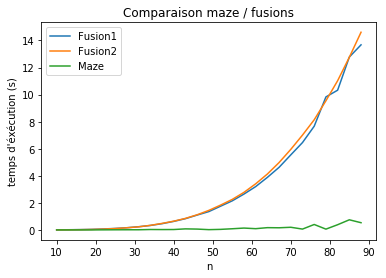

In [88]:
#On compare pour des labyrinthes carrés de taille n*n
N = int(input("Longueur maximum des labyrinthes (carrés) : N = "))
if N > 90:
    N = 90
X = np.arange(10, N, 3)
print(X)
print("Le code va s'éxécuter en environ 50 secondes. (pour N > 90)")
Y1, Y2, Y3 = [], [], []
for n in X:
    L = Labb(n, n)
    t1 = perf_counter()
    L.fusion1()
    t2 = perf_counter()
    Y1.append(t2 - t1)
    t1 = perf_counter()
    L.fusion2()
    t2 = perf_counter()
    Y2.append(t2 - t1)
    t1 = perf_counter()
    L.maze()
    t2 = perf_counter()
    Y3.append(t2 - t1)
clear_output()
plot(X, Y1, label = "Fusion1")
plot(X, Y2, label = "Fusion2")
plot(X, Y3, label = "Maze")
title("Comparaison maze / fusions")
xlabel("n")
ylabel("temps d'éxécution (s)")
legend()
savefig("maze_vs_fusion")
show()

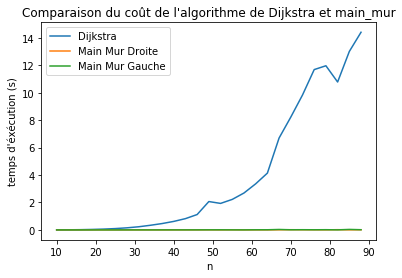

In [89]:
N = int(input("Longueur maximum des labyrinthes (carrés) : N = "))
if N > 90:
    N = 90
X = np.arange(10, N, 3)
print("Le code va s'éxécuter en environ 20 secondes. (pour N > 90)")
Y1, Y2, Y3 = [], [], []
for n in X:
    L = Labb(n, n)
    L.maze()
    G = Graphe(L)
    t1 = perf_counter()
    _ = G.dijkstra((0, 0), (n - 1, n - 1))
    t2 = perf_counter()
    Y1.append(t2 - t1)
    L.maze()
    t1 = perf_counter()
    _ = main_mur(L, 1)
    t2 = perf_counter()
    Y2.append(t2 - t1)
    t1 = perf_counter()
    _ = main_mur(L, -1)
    t2 = perf_counter()
    Y3.append(t2 - t1)
clear_output()
plot(X, Y1, label = "Dijkstra")
plot(X, Y2, label = "Main Mur Droite")
plot(X, Y3, label = "Main Mur Gauche")
title("Comparaison du coût de l'algorithme de Dijkstra et main_mur")
xlabel("n")
ylabel("temps d'éxécution (s)")
legend()
savefig("dijkstra_vs_mainmur")
show()

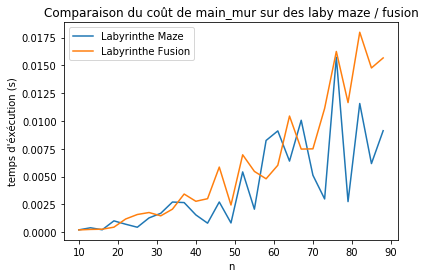

In [90]:
N = int(input("Longueur maximum des labyrinthes (carrés) : N = "))
if N > 90:
    N = 90
X = np.arange(10, N, 3)
print("Le code va s'éxécuter en environ 30 secondes. (pour N > 90)")
Y1, Y2 = [], []
for n in X:
    L = Labb(n, n)
    L.maze()
    t1 = perf_counter()
    _ = main_mur(L, 1)
    t2 = perf_counter()
    Y1.append(t2 - t1)
    L.fusion1()
    G = Graphe(L)
    t1 = perf_counter()
    _ = main_mur(L, 1)
    t2 = perf_counter()
    Y2.append(t2 - t1)
clear_output()
plot(X, Y1, label = "Labyrinthe Maze")
plot(X, Y2, label = "Labyrinthe Fusion")
title("Comparaison du coût de main_mur sur des laby maze / fusion")
xlabel("n")
ylabel("temps d'éxécution (s)")
legend()
savefig("mainmur_maze_vs_fusion")
show()

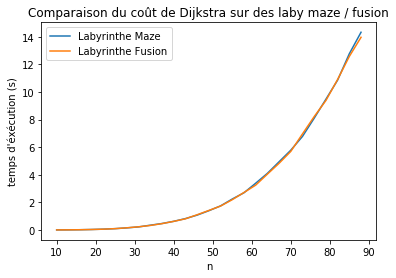

In [92]:
N = int(input("Longueur maximum des labyrinthes (carrés) : N = "))
if N > 90:
    N = 90
X = np.arange(10, N, 3)
print("Le code va s'éxécuter en environ 1 min et 30 secondes. (pour N > 90)")
Y1, Y2 = [], []
for n in X:
    L = Labb(n, n)
    L.maze()
    G = Graphe(L)
    t1 = perf_counter()
    _ = G.dijkstra((0, 0), (n - 1, n - 1))
    t2 = perf_counter()
    Y1.append(t2 - t1)
    L.fusion1()
    G = Graphe(L)
    t1 = perf_counter()
    _ = G.dijkstra((0, 0), (n - 1, n - 1))
    t2 = perf_counter()
    Y2.append(t2 - t1)
clear_output()
plot(X, Y1, label = "Labyrinthe Maze")
plot(X, Y2, label = "Labyrinthe Fusion")
title("Comparaison du coût de Dijkstra sur des laby maze / fusion")
xlabel("n")
ylabel("temps d'éxécution (s)")
legend()
savefig("D_maze_vs_fusion")
show()

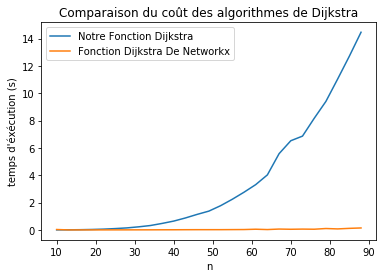

In [93]:
N = int(input("Longueur maximum des labyrinthes (carrés) : N = "))
if N > 90:
    N = 90
X = np.arange(10, N, 3)
print("Le code va s'éxécuter en environ 30 secondes. (pour N > 90)")
Y1, Y2 = [], []
for n in X:
    L = Labb(n, n)
    L.maze()
    G = Graphe(L)
    t1 = perf_counter()
    _ = G.dijkstra((0, 0), (n - 1, n - 1))
    t2 = perf_counter()
    Y1.append(t2 - t1)
    G = Graphe(L)
    t1 = perf_counter()
    g = my_Graph_to_nx_Graph(G)
    _ = nx.single_source_dijkstra(g, 0, n ** 2 - 1)
    t2 = perf_counter()
    Y2.append(t2 - t1)
clear_output()
plot(X, Y1, label = "Notre Fonction Dijkstra")
plot(X, Y2, label = "Fonction Dijkstra De Networkx")
title("Comparaison du coût des algorithmes de Dijkstra")
xlabel("n")
ylabel("temps d'éxécution (s)")
legend()
savefig("my_D_vs_nx_D")
show()

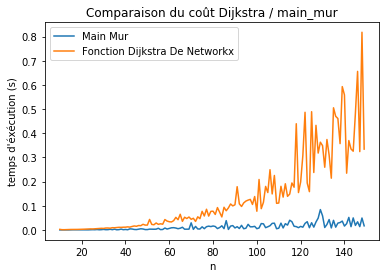

In [96]:
N = int(input("Longueur maximum des labyrinthes (carrés) : N = "))
if N > 900:
    N = 900
X = np.arange(10, N, 1)
print("Le code va s'éxécuter en environ 3 secondes. (pour N > 90)")
Y1, Y2 = [], []
for n in X:
    L = Labb(n, n)
    L.maze()
    t1 = perf_counter()
    _ = main_mur(L, 1)
    t2 = perf_counter()
    Y1.append(t2 - t1)
    G = Graphe(L)
    t1 = perf_counter()
    g = my_Graph_to_nx_Graph(G)
    _ = nx.single_source_dijkstra(g, 0, n ** 2 - 1)
    t2 = perf_counter()
    Y2.append(t2 - t1)
clear_output()
plot(X, Y1, label = "Main Mur")
plot(X, Y2, label = "Fonction Dijkstra De Networkx")
title("Comparaison du coût Dijkstra / main_mur")
xlabel("n")
ylabel("temps d'éxécution (s)")
legend()
savefig("mainmur_vs_nx_D")
show()

In [6]:
longueur_mur = 25
W = 15
H = 15
deb = (longueur_mur, longueur_mur)
fin = (W * longueur_mur, H * longueur_mur)

In [48]:
def fenetre(nom):
    f = Tk()
    f.title(nom)
    return f

def canvas(fen, long, larg, bg):
    c = Canvas(fen, width = long, height = larg, background = bg)
    return c

def carre(can, x, y, long, clr):
    can.create_rectangle(x, y, x + long, y + long, fill = clr, outline = '')
    
def ligneV(can, x, y, long):
    can.create_line(x, y, x, y + long)
    
def ligneH(can, x, y, long):
    can.create_line(x, y, x + long, y)

def affiche_laby(can, laby, deb, fin, LMur):
    carre(can, *deb, LMur, 'cyan')
    carre(can, *fin, LMur, 'orange')
    for i in range(laby.cols):
        for j in range(laby.lines):
            if laby.grille[j][i][1][0]:
                ligneH(can, (i + 1) * LMur, (j + 1) * LMur, LMur)
            if laby.grille[j][i][1][1]:
                ligneV(can, (i + 2) * LMur, (j + 1) * LMur, LMur)
    ligneV(can, LMur, LMur, laby.lines * LMur)
    ligneH(can, LMur, (laby.lines + 1) * LMur, laby.cols * LMur)
    
def affiche_laby2(can, laby, LMur):
    for i in range(laby.lines):
        carre(can, LMur, (i + 1) * LMur, LMur, 'cyan')
        carre(can, laby.cols * LMur, (i + 1) * LMur, LMur, 'orange')
    for i in range(laby.cols):
        for j in range(laby.lines):
            if laby.grille[j][i][1][0]:
                ligneH(can, (i + 1) * LMur, (j + 1) * LMur, LMur)
            if laby.grille[j][i][1][1]:
                ligneV(can, (i + 2) * LMur, (j + 1) * LMur, LMur)
    ligneV(can, LMur, LMur, laby.lines * LMur)
    ligneH(can, LMur, (laby.lines + 1) * LMur, laby.cols * LMur)

def affiche_sol(fen, can, sol, LMur, delay = 30):
    n = len(sol)
    centreur = LMur * 3 / 2
    compteur = {}
    for i in range(n):
        compteur[sol[i]] = 1
    for i in range(n - 1):
        can.after(delay)
        fen.update()
        can.create_line(sol[i][1] * LMur + centreur, sol[i][0] * LMur + centreur,
                        sol[i + 1][1] * LMur + centreur, sol[i + 1][0] * LMur + centreur,
                        width = compteur[sol[i]], fill = 'red')
        compteur[sol[i]] += 3

In [49]:
f = fenetre("Labyrinthe")
c = canvas(f, (W + 2) * longueur_mur, (H + 2) * longueur_mur, 'white')
c.pack()
L = Labb(H, W)
L.maze()
G = Graphe(L)
P = my_Graph_to_nx_Graph(G)
l = nx.single_source_dijkstra(P, 0, W * H - 1)[1]
sol = liste_de_nombres_to_coords(l, W)
affiche_laby(c, L, deb, fin, longueur_mur)
affiche_sol(f, c, sol, longueur_mur)
x = c.winfo_rootx()
y = c.winfo_rooty()
w = c.winfo_width()
h = c.winfo_height()
f.mainloop()
img = grab((x + 2, y + 2, x + w - 2, y + h - 2)).save("dijkstra_tkinter.png")

In [50]:
f = fenetre("Labyrinthe")
c = canvas(f, (W + 2) * longueur_mur, (H + 2) * longueur_mur, 'white')
c.pack()
L = Labb(H, W)
L.maze()
#L.random(0.1)
sol = main_mur(L, 1)
affiche_laby(c, L, deb, fin, longueur_mur)
affiche_sol(f, c, sol, longueur_mur, delay = 5)
x = c.winfo_rootx()
y = c.winfo_rooty()
w = c.winfo_width()
h = c.winfo_height()
f.mainloop()
img = grab((x + 2, y + 2, x + w - 2, y + h - 2)).save("mainmur_tkinter.png")

190 213 429 429


In [6]:
def materiau_poreux(n_lignes, n_cols, p, affiche = False):

    g = nx.Graph()
    L = Labb(n_lignes, n_cols)
    L.init()
    L.full()
    L.random(p)
    b = Graphe(L)
    g = my_Graph_to_nx_Graph(b)

    departs = [i for i in range(0, n_lignes * n_cols, n_cols)]
    arrivees = [i for i in range(n_cols - 1, n_lignes * n_cols, n_cols)]
    passage = False
    flag2 = False
    
    if affiche:
        f = fenetre("Labyrinthe")
        c = canvas(f, (n_cols + 2) * longueur_mur, (n_lignes + 2) * longueur_mur, 'white')
        c.pack()
        affiche_laby2(c, L, longueur_mur)
        deb = (longueur_mur, longueur_mur)
        fin = (n_lignes * longueur_mur, n_cols * longueur_mur)

    for dep in departs:
        flag1 = False
        try:
            chem = sorted(list(nx.predecessor(g, dep)))
        except nx.NodeNotFound:
            flag1 = True
            pass
        if not flag1:
            for arr in arrivees:
                if arr in chem:
                    passage = True
                    if affiche:
                        m = nx.single_source_dijkstra(g, dep, arr)[1]
                        sol = liste_de_nombres_to_coords(m, n_cols)
                        affiche_sol(f, c, sol, longueur_mur, delay = 0)
                if passage:
                    flag2 = True
                    break
            if flag2:
                break

    if affiche:
        f.mainloop()
    
    return passage

In [33]:
def test(n_lignes, n_cols, proba, N):
    if type(proba) != list:
        proba = [proba]
    for p in proba:
        c = 0
        for i in range(N):
            if materiau_poreux(n_lignes, n_cols, p):
                c += 1
        #print("Pour p =", p, "\tavec une grille", n_lignes, "x", n_cols, 
         #     "\tla proportion de materiaux laissant passer de l'eau est\t", c / N)
    return c / N

0.4997714285714286


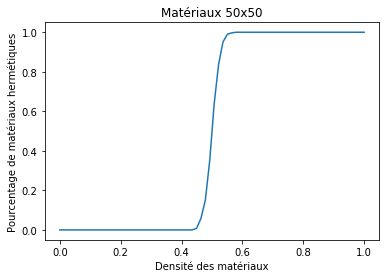

In [41]:
nl = 50
nc = 50
p = np.linspace(0, 1, 70)
l = []
for proba in p:
    l.append(test(nl, nc, proba, 10 ** 3))
plot(p, l);
xlabel("Densité des matériaux");
ylabel("Pourcentage de matériaux hermétiques");
title("Matériaux " + str(nl) + "x" + str(nc));
print(sum(l) / len(l))